In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [63]:
# Load dataset
iris = datasets.load_iris()

In [64]:
X = iris.data

In [65]:
X.shape

(150, 4)

In [76]:
import pandas as pd
sample_df = pd.DataFrame(X,columns=['x'+str(i) for i in range(1,5)])
sample_df.head()

,x1,x2,x3,x4
0,1.6355,0.0355,-2.0645,-3.2645
1,1.4355,-0.4645,-2.0645,-3.2645
2,1.2355,-0.2645,-2.1645,-3.2645
3,1.1355,-0.3645,-1.9645,-3.2645
4,1.5355,0.1355,-2.0645,-3.2645


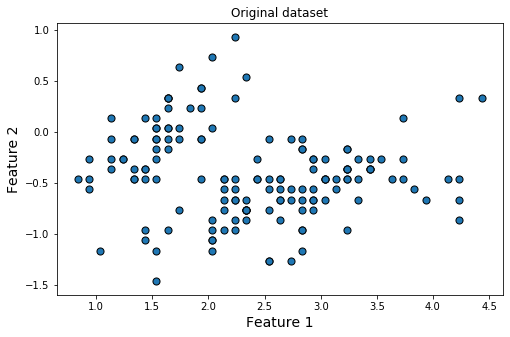

In [77]:
plt.figure(figsize=(8,5))    
plt.scatter(sample_df['x1'],sample_df['x2'],s=50, edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset")
plt.show()

In [66]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)


In [67]:
clf.fit(X)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

In [68]:
sim_mat = clf.transform()
print(sim_mat)

[[1.   0.08 0.07 ... 0.   0.   0.  ]
 [0.07 1.   0.11 ... 0.   0.   0.  ]
 [0.03 0.19 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.04 0.09]
 [0.   0.   0.   ... 0.05 1.   0.03]
 [0.   0.   0.   ... 0.14 0.02 1.  ]]


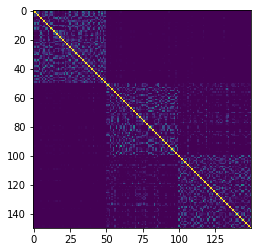

In [69]:
plt.imshow(sim_mat)

In [70]:
sim_mat.shape

(150, 150)

In [78]:
X -= X.mean()
center_df = pd.DataFrame(X,columns=['x'+str(i) for i in range(1,5)])
center_df.head()

,x1,x2,x3,x4
0,1.6355,0.0355,-2.0645,-3.2645
1,1.4355,-0.4645,-2.0645,-3.2645
2,1.2355,-0.2645,-2.1645,-3.2645
3,1.1355,-0.3645,-1.9645,-3.2645
4,1.5355,0.1355,-2.0645,-3.2645


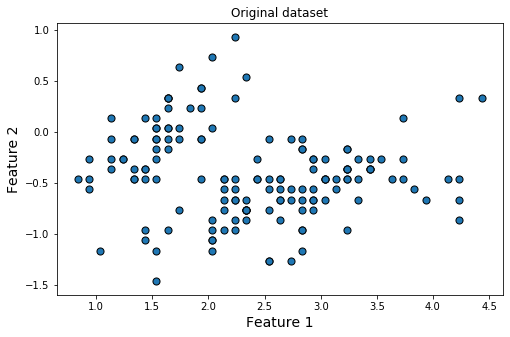

In [79]:
plt.figure(figsize=(8,5))    
plt.scatter(center_df['x1'],center_df['x2'],s=50, edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


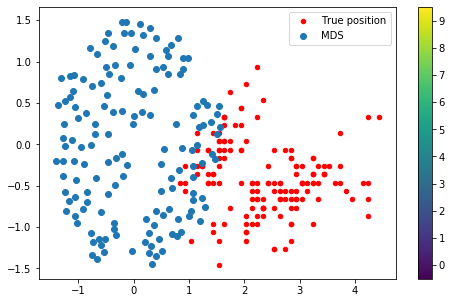

In [81]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2, metric = True)
#X_transformed = embedding.fit_transform(sim_mat)
#X_transformed.shape
plt.figure(figsize=(8,5)) 
proj = embedding.fit_transform(sim_mat)
plt.scatter(X[:, 0], X[:, 1], c='r', s=20)
plt.scatter(proj[:, 0], proj[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','MDS'), loc='best')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


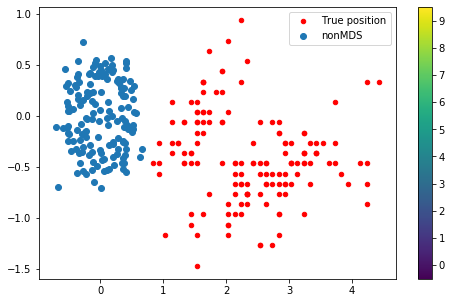

In [83]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2, metric = False)
#X_transformed = embedding.fit_transform(sim_mat)
#X_transformed.shape
proj = embedding.fit_transform(sim_mat)
plt.figure(figsize=(8,5)) 
plt.scatter(X[:, 0], X[:, 1], c='r', s=20)
plt.scatter(proj[:, 0], proj[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','nonMDS'), loc='best')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);
